# **Projeto TCC**

## Título : O uso de modelos de aprendizagem de máquina para identificação das principais características do Transtorno do Espectro Autista em Crianças

### Objetivo

O Transtorno do Espectro Autista (TEA)  ́e caracterizado como resultado de problemas no neurodesenvolvimento que provocam comportamentos atípicos que afetam, principalmente, o desenvolvimento motor, a comunicação e as relações sociais. Associados a esses déficits, algumas crianças apresentam repert ́orio restrito de interesses e atividades, como também,
padrões repetitivos de comportamento. Além disso, cada criança  ́e diagnosticada de acordo com o grau de comprometimento das habilidades que serão diferenciadas por níveis e especificidade. Por este motivo, que esse transtorno é conhecido de “espectro autista”.
Pesquisas revelam que nos  ́ultimos anos o número de ocorrências de crianças que manifestam sintomas e são diagnósticadas com o TEA, vem crescendo significativamente.
A Organização Mundial da Saúde (OMS) apontou que uma a cada 160 crianças possui o diagnóstico em todo o mundo. No Brasil, estudos indicam que aproximadamente uma a cada 143 crianças de até 04 anos possuem fortes indícios de serem diagnósticadas com TEA, nos meninos aparecem com maior ocorrência em 04 vezes em relação ao número de meninas. A agência de saúde, salienta ainda, que não existe cura para o TEA, no entanto, dependendo do nível de gravidade do diagnóstico, e com terapias adequadas  ́e
possível viver de forma independente.
Portanto, devido à importância do tema o presente estudo tem o intuito de avaliar o desempenho de 03 (três) algoritmos supervisionados de AM (Random Forest, K-NN e Naive-Bayes) para indicar se uma criança possui características comportamentais do Transtorno do Espectro Autista (TEA). Somado a isso, pretende-se ainda, realizar uma análise exploratória na base de dados com intuito de averiguar a eficácia do instrumento de rastreamento AQ 10 Child em relação aos comportamentos característicos do TEA, consequentemente, responder as questões seguinte questões de pesquisa: ̃
1. Quantas crianças os pais ou responsáveis indicaram possuir o diagnóstico do TEA?
2. Qual a faixa etária das crianças com diagnóstico do TEA?
3. Qual o gênero predominante das crianças que possui o TEA?
4. A criança possuir Icterícia colabora para a manifestação do TEA?
5. Quais os paıses com maior ocorrência do diagnóstico?
6. Existe criança do Brasil que tenha participado da pesquisa, se sim, quais os comportamentos característicos apresentados, e seu perfil?
7. Quantos comportamentos atípicos podem caracterizar que uma criança possui o TEA?
8. Quais os sinais do transtorno que possui maior ocorrências nas crianças com o TEA?


### Dicionário dos Dados

|Atributo                 |     Dicionário                                    |
|-------------------------|---------------------------------------------------|
|A1_Score                 | Alta percepção em baixos ruídos que geralmente outros não percebem?                                          |
|A2_Score                 | Maior concentração na visão do todo em comparação a pequenos detalhes?                                          |
|A3_Score                  | Facilidade de comunicação com várias pessoas diferentes ao mesmo tempo?                                               |
|A4_Score                    | Facilidade de fazer múltiplas tarefas simultaneamente?                                             | 
|A5_Score            | Dificuldade de manter uma conversa com seus colegas?                  |
|A6_Score           | Facilidade em manter conversas informais?     |
|A7_Score                | Dificuldade de percepção de intenções e sentimentos em histórias?                                                                        |
|A8_Score            | Dificuldade de brincar com a imaginação fugindo da realidade   |
|A9_Score            |Facilidade de reconhecer sentimentos a partir de expressões faciais alheias?  |
|A10_Score             | Dificuldade de fazer novas amizades?  |
|age             | numeric |
|gender                 | Categorical (m or f) |
|ethnicity             |  Categorical  |
|icterícia        | Categorical (yes or no)                            |
|austim                | Categorical (yes or no)                       | 
|contry_of_res                 | Categorical   |
|used_app_before                    | Categorical (yes or no)          |
|result numeric| Numeric                        |
|age_desc  | Categorical                         |
|relation PDD                | Categorical (yes or no)    |
|Class/ASD               | Categorical (yes or no)                           |

### Link do Git:
- https://github.com/livyReis/tcc_autismo

### Importando as bibliotecas

In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import kruskal

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from numpy.random import randn
from numpy.random import seed

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, precision_score


In [74]:
#Estilo dos gráficos
plt.style.use('seaborn-bright')
#Padronizando o tamanho dos gráficos 
plt.rcParams['figure.figsize'] = (5,4)
%matplotlib inline

**Lendo o Dataset**

In [75]:
autismo_criancas = pd.read_csv('Dados/Autism-Child-Data.csv')

In [76]:
# Renomeando as colunas
autismo_criancas.columns = ["AQ01", "AQ02", "AQ03", "AQ04", "AQ05","AQ06","AQ07","AQ08","AQ09","AQ10", "age","gender", "ethnicity", "icterícia", "austim", "contry_of_res", "used_app_before", "result numeric", "age_desc", "relation PDD", "Class/ASD"]

**Visão Geral do Dataframe**

In [77]:
# Visualizando as 03 primeiras linhas do Dataframe
autismo_criancas.head(3)

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,...,gender,ethnicity,icterícia,austim,contry_of_res,used_app_before,result numeric,age_desc,relation PDD,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
2,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO


In [78]:
# Visualizando o número de entradas e atributos contidos no Dataframe
autismo_criancas.shape

(291, 21)

In [79]:
# Visualizando os tipos dos dados
autismo_criancas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AQ01             291 non-null    int64 
 1   AQ02             291 non-null    int64 
 2   AQ03             291 non-null    int64 
 3   AQ04             291 non-null    int64 
 4   AQ05             291 non-null    int64 
 5   AQ06             291 non-null    int64 
 6   AQ07             291 non-null    int64 
 7   AQ08             291 non-null    int64 
 8   AQ09             291 non-null    int64 
 9   AQ10             291 non-null    int64 
 10  age              291 non-null    object
 11  gender           291 non-null    object
 12  ethnicity        291 non-null    object
 13  icterícia        291 non-null    object
 14  austim           291 non-null    object
 15  contry_of_res    291 non-null    object
 16  used_app_before  291 non-null    object
 17  result numeric   291 non-null    in

**Pré-Processamento dos Dados**

Observou-se que existia no Dataset dados ausentes preenchidos com o ponto de interrogação, nesse caso foi realizado a alteração dos dados para posteriormente eliminá-los.

In [80]:
# Substituindo valores com '?' por Nan para posteriormente eliminá-los.
autismo_criancas = autismo_criancas.replace('?', np.nan)

In [81]:
# Visualizando a porcentagem total de dados nulos no Dataset
autismo_criancas.isnull().sum()/autismo_criancas.shape[0]*100

AQ01                0.000000
AQ02                0.000000
AQ03                0.000000
AQ04                0.000000
AQ05                0.000000
AQ06                0.000000
AQ07                0.000000
AQ08                0.000000
AQ09                0.000000
AQ10                0.000000
age                 1.374570
gender              0.000000
ethnicity          14.776632
icterícia           0.000000
austim              0.000000
contry_of_res       0.000000
used_app_before     0.000000
result numeric      0.000000
age_desc            0.000000
relation PDD       14.776632
Class/ASD           0.000000
dtype: float64

Após a alteração dos dados foi observado que o número de dados nulos era significativo para a quantidade total de entradas contidas no dataset. Dessa forma, optou-se pela remoção dos atributos que apresentavam maior incidência de dados ausentes, por entender que esta ação não afetaria a quantidade de instâncias totais no dataframe, por fim, foi eliminado apenas 04 linhas para a eliminação de dados nulos contidos no atributo idade. 

In [82]:
# Elimando as colunas com os dados ausentes e atributos que não serão utilizados nas análises futuras
autismo_criancas.drop(columns=['ethnicity','relation PDD', 'used_app_before','age_desc'], inplace = True, axis = 1)

In [83]:
autismo_criancas.dropna(inplace = True, axis = 0)

In [84]:
# Visualizando se ainda existem dados nulos no Dataset
autismo_criancas.isnull().sum()

AQ01              0
AQ02              0
AQ03              0
AQ04              0
AQ05              0
AQ06              0
AQ07              0
AQ08              0
AQ09              0
AQ10              0
age               0
gender            0
icterícia         0
austim            0
contry_of_res     0
result numeric    0
Class/ASD         0
dtype: int64

**Alterando os tipos dos dados com intuito de melhor analisá-los**

In [85]:
autismo_criancas['AQ01'] = autismo_criancas['AQ01'].astype('int64')
autismo_criancas['AQ02'] = autismo_criancas['AQ02'].astype('int64')
autismo_criancas['AQ03'] = autismo_criancas['AQ03'].astype('int64')
autismo_criancas['AQ04'] = autismo_criancas['AQ04'].astype('int64')
autismo_criancas['AQ05'] = autismo_criancas['AQ05'].astype('int64')
autismo_criancas['AQ06'] = autismo_criancas['AQ06'].astype('int64')
autismo_criancas['AQ07'] = autismo_criancas['AQ07'].astype('int64')
autismo_criancas['AQ08'] = autismo_criancas['AQ08'].astype('int64')
autismo_criancas['AQ09'] = autismo_criancas['AQ09'].astype('int64')
autismo_criancas['AQ10'] = autismo_criancas['AQ10'].astype('int64')
autismo_criancas['age'] = autismo_criancas['age'].astype('int64')
autismo_criancas['gender'] = autismo_criancas['gender'].astype('category')
autismo_criancas['icterícia'] = autismo_criancas['icterícia'].astype('category')
autismo_criancas['austim'] = autismo_criancas['austim'].astype('category')
autismo_criancas['contry_of_res'] = autismo_criancas['contry_of_res'].astype('category')
autismo_criancas['result numeric'] = autismo_criancas['result numeric'].astype('int64')
autismo_criancas['Class/ASD'] = autismo_criancas['Class/ASD'].astype('category')

In [86]:
autismo_criancas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 290
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   AQ01            287 non-null    int64   
 1   AQ02            287 non-null    int64   
 2   AQ03            287 non-null    int64   
 3   AQ04            287 non-null    int64   
 4   AQ05            287 non-null    int64   
 5   AQ06            287 non-null    int64   
 6   AQ07            287 non-null    int64   
 7   AQ08            287 non-null    int64   
 8   AQ09            287 non-null    int64   
 9   AQ10            287 non-null    int64   
 10  age             287 non-null    int64   
 11  gender          287 non-null    category
 12  icterícia       287 non-null    category
 13  austim          287 non-null    category
 14  contry_of_res   287 non-null    category
 15  result numeric  287 non-null    int64   
 16  Class/ASD       287 non-null    category
dtypes: category(5), 

**Sumário dos dados contínuos**

In [87]:
autismo_criancas.describe()

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,result numeric
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,0.634146,0.533101,0.745645,0.554007,0.749129,0.710801,0.609756,0.491289,0.498258,0.731707,6.355401,6.257840
std,0.482510,0.499775,0.436259,0.497943,0.434272,0.454182,0.488657,0.500797,0.500870,0.443845,2.369495,2.281669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


**Checando Outliers**

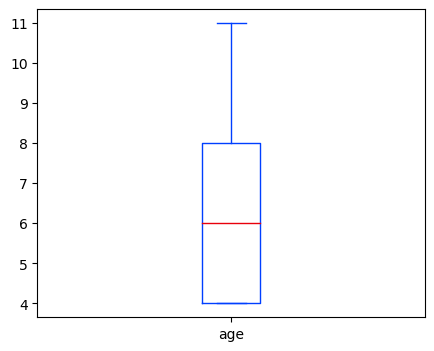

In [88]:
autismo_criancas['age'].plot.box();

## Análise Exploratória dos Dados

**Breve explicação para entendimento das análises e remoções realizadas nas seções seguintes.**
- Essa base de dados foi coletada com uso de um software para celular denominado de ASDTests criado pelos autores Thabtah et al. 2018, cujo tema é: A new computational intelligence approach to detect autistic features for autism screenings pelo. O aplicativo possui 10 perguntas relacionadas aos padrões comportamentais do TEA, baseadas no instrumento de rasteamento denominado AQ-10-Child. Posteriormente, os autores realizaram uma pesquisa em diversos países, disponibilizando os resultados nos principais repositórios de código aberto (Kaggle e Universidade da Calif ́ornia-Irvine-UCI). Basicamente, o aplicativo utiliza um algoritmo que soma o número de respostas positivas e armazena na variável ”result numeric”, a criança que apresentar a partir de sete sinais comportamentais sugeridos pelo questionário é classificada possuir TEA na variável Class/ASD. No entanto, ao realizar uma exploração dos dados, observou-se que as crianças que participaram da pesquisa e que haviam sido indicadas pelos responsáveis possuir o diagnóstico do TEA, não necessariamente, apresentavam a partir de sete características comportamentais. Dessa forma, o presente estudo utilizará a base de dados sem a classificação realizada pelo aplicativo ASDTests para implementar os modelos de Aprendizagem de Maquina (Random Forest, K-NN e Naive-Bayes e Máquina de Vetor de Suporte). Abaixo é demonstrado todas as análises realizadas que possibilita uma melhor compreensão do que foi relatado acima.

## Crianças indicada com TEA por seus responsáveis

In [89]:
autismo_criancas['austim'].value_counts()

no     238
yes     49
Name: austim, dtype: int64

Observa-se que já existia 49 crianças com diagnóstico do TEA, na análise seguinte será exibido a classificação realizada pelo aplicativo ASDTests.

## Classificação realizada pelo aplicativo ASDTests

**Frequência das Crianças que foram avaliadas pelo aplicativo ASDTests para identificação dos comportamentos característicos do TEA**

In [90]:
autismo_criancas['Class/ASD'].value_counts()

NO     148
YES    139
Name: Class/ASD, dtype: int64

Observa-se uma diferença significativa do número de casos indicados pelo algoritmo do aplicativo para os informados pelos responsáveis, até aqui sem problemas, já que é natural o algoritmo encontrar novos casos de TEA.

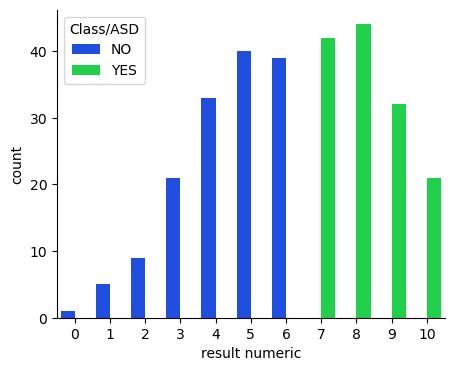

In [91]:
# Visualizando a classificação pelo aplicativo.
sns.countplot(data = autismo_criancas, x='result numeric', hue='Class/ASD')
sns.despine()

O gráfico acima nos permite observar que a classificação realizada pelo aplicativo ASDTest, basicamente, soma o número de respostas positivas e armazena na variável "result numeric", a criança que apresentar a partir de sete sinais comportamentais sugeridos pelo questionário é classificada possuir TEA na variável Class/ASD.

No entanto, ao realizar uma exploração dos dados, observou-se que as crianças que participaram da pesquisa e que haviam sido indicadas por seus responsáveis possuir o diagnóstico do TEA, não necessariamente, apresentavam a partir de sete características comportamentais, conforme gráfico abaixo.

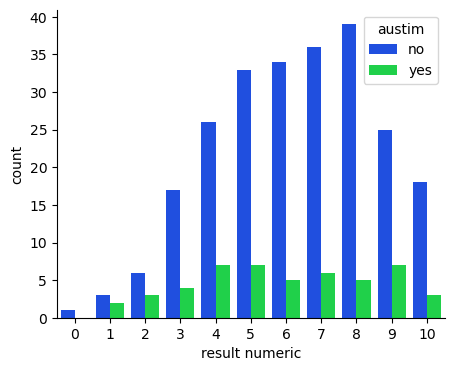

In [92]:
# Plotando da frequência das idades
sns.countplot(data = autismo_criancas, x='result numeric', hue='austim')
sns.despine()

Nas análises abaixo faremos um filtro para analisarmos as características comportamentais das crianças que foram indicadas por seus responsáveis já possuir o diagnóstico do TEA e verificar se o algoritmo utilizado pelo aplicativo ASDTests classificou corretamente as crianças indicadas por seus responsáveis possuir o TEA. 

## Explorando as características das Crianças que foram indicadas pelos responsáveis possuir TEA.

In [93]:
criancas_TEA = autismo_criancas.loc[autismo_criancas['austim'] == 'yes']

In [94]:
criancas_TEA.head()

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
4,0,0,1,0,1,1,0,1,0,1,4,m,no,yes,Egypt,5,NO
8,0,0,1,1,1,0,1,1,0,0,11,f,no,yes,Austria,5,NO
17,1,0,1,1,1,0,1,1,1,1,11,m,no,yes,'United States',8,YES
24,0,0,1,1,1,0,1,1,1,0,6,m,no,yes,'United Kingdom',6,NO
27,0,1,1,0,0,0,1,1,0,1,6,m,no,yes,'United Arab Emirates',5,NO


In [95]:
criancas_TEA.shape

(49, 17)

O conjunto de Dados possuia 291 entradas, com 49 crianças que os responsáveis indicaram já possuir o diagnóstico do TEA. Dessa forma temos uma base de dados desbalanceada. Abaixo faremos algumas análises com o intuíto de explorar o máximo as características pertinentes ao grupo de crianças com TEA.

In [96]:
criancas_TEA['Class/ASD'].value_counts()

NO     28
YES    21
Name: Class/ASD, dtype: int64

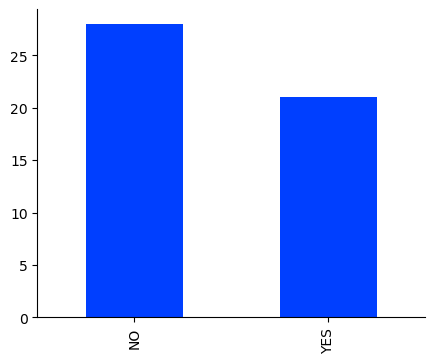

In [97]:
criancas_TEA['Class/ASD'].value_counts().plot.bar()
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.show()

O gráfico acima demonstra que o aplicativo ASDTests não classificou na sua análise 28 crianças de possuir o Transtorno do Espectro Autista (TEA), fato este que inviabiliza seu método utilizado, pois o uso do somatório dos comportamentos característicos a partir de sete perguntas não é eficiente para indicar se a criança possui indícios de possuir o transtorno. Nas análises abaixo buscaremos mais evidências que comprovam tais questionamentos.

## Respondendo as questões de Pesquisa

### **QP 01: Quantas crianças que participaram da pesquisa os pais ou responsáveis indicaram possuir o diagnóstico do TEA?**

In [98]:
autismo_criancas['austim'].value_counts()

no     238
yes     49
Name: austim, dtype: int64

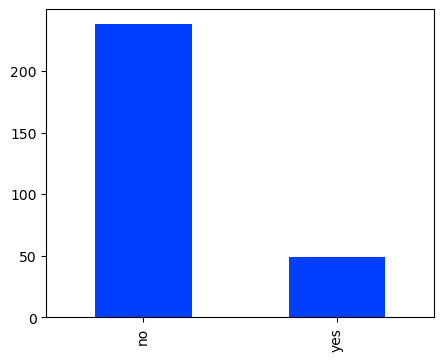

In [99]:
autismo_criancas['austim'].value_counts().plot.bar();


**Porcentagem das crianças que participaram da Pesquisa e já possuiam o dignóstico do Transtorno do Espectro Autista(TEA)**

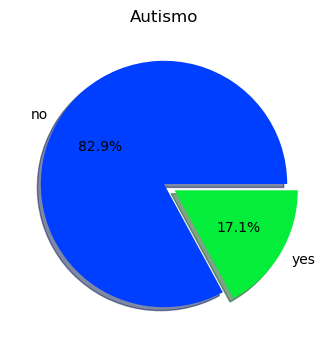

In [100]:
porcentagem_autismo = autismo_criancas['austim'].value_counts()
#define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(porcentagem_autismo, autopct='%1.1f%%', labels = autismo_criancas['austim'].unique(), shadow=True, explode=explode)

# define que o gráfico será plotado em circulo
#plt.axis('equal')
plt.title('Autismo')
plt.show()

In [101]:
autismo_criancas['austim'].value_counts()

no     238
yes     49
Name: austim, dtype: int64

Observa-se que já existia na base de dados 49 crianças com diagnóstico do TEA indicadas por seus responsáveis, indicando que acima de 80% da base de dados era de crianças sem o diagnóstico inicial do TEA.

### **QP 02: Qual a faixa etária das crianças com diagnóstico do  TEA?**

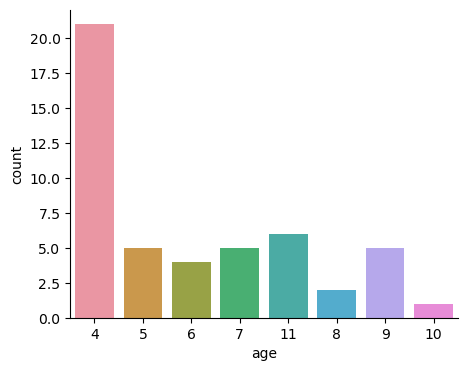

In [102]:
# Plotando a frequência das idades
sns.countplot(data = criancas_TEA, x='age', order = autismo_criancas["age"].value_counts().index)
sns.despine()

### **QP 03: Qual o gênero predominante das crianças que possui TEA?**

In [103]:
criancas_TEA['gender'].value_counts()

m    31
f    18
Name: gender, dtype: int64

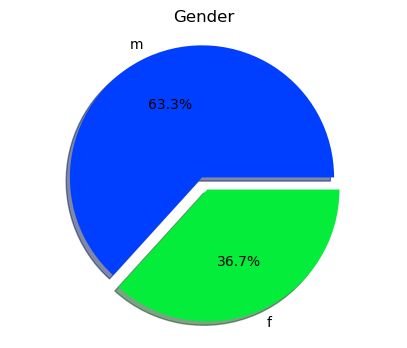

In [104]:
porcentagem_autismo = criancas_TEA['gender'].value_counts()/criancas_TEA.shape[0]*100
#define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(porcentagem_autismo, autopct='%1.1f%%', labels = criancas_TEA['gender'].unique(), shadow=True, explode=explode)

# define que o gráfico será plotado em circulo
plt.axis('equal')
plt.title('Gender')
plt.show()

O gráfico exibe a predominância do gênero masculino nas crianças com TEA. 

### **QP 04: A Criança possuir Icterícia colabora para a manifestação do TEA?**

**Porcentagem das crianças que apresentam Icterícia**

In [105]:
criancas_TEA['icterícia'].value_counts()

no     38
yes    11
Name: icterícia, dtype: int64

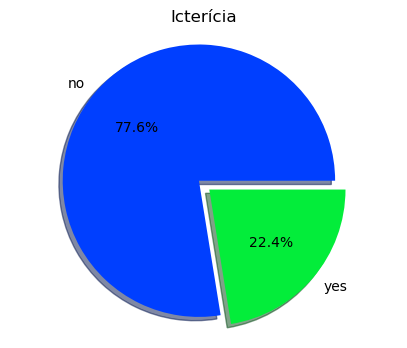

In [106]:
porcentagem_ictericia = criancas_TEA['icterícia'].value_counts()/criancas_TEA.shape[0]*100
#define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(porcentagem_ictericia , autopct='%1.1f%%', labels = criancas_TEA['icterícia'].unique(), shadow=True, explode=explode)

# define que o gráfico será plotado em circulo
plt.axis('equal')
plt.title('Icterícia')
plt.show()

Observa-se que as crianças com o Transtorno do Espectro Autista (TEA) na sua maioria não está associada possuir também Icterícia, uma vez que, o grupo de crianças com TEA, majoritariamente, não apresentavam o diagnóstico de Icterícia.

### **QP 05: Quais os países com maior ocorrência do diagnóstico?**

In [107]:
# Adicionando a contagem dos crimes em um Dataframe.
cont_contry_of_res = criancas_TEA['contry_of_res'].value_counts()[:10].reset_index();

In [108]:
cont_contry_of_res

,index,contry_of_res
0,'United Kingdom',14
1,'United States',7
2,Australia,7
3,India,3
4,Mexico,2
5,'United Arab Emirates',2
6,Canada,2
7,'Costa Rica',1
8,Bangladesh,1
9,Pakistan,1


### **QP 06: Existe criança do Brasil que tenha participado da Pesquisa, se sim, quais os comportamentos característicos do TEA apresentados?**

In [109]:
criancas_TEA_Brasil = criancas_TEA.loc[criancas_TEA['contry_of_res'] == 'Brazil']

In [110]:
criancas_TEA_Brasil

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
77,1,1,1,1,1,1,1,0,1,1,4,m,no,yes,Brazil,9,YES


O Brasileiro apresentou 09 das 10 características comportamentais sugeridas no questionário AQ_10_child, possuia 04 anos de idade e era do sexo Masculino, por fim, não possuia Icterícia.

### **QP 07: Quantos comportamentos atípicos sugeridos pelo questionário AQ_10_child podem caracterizar que uma criança possui TEA?**

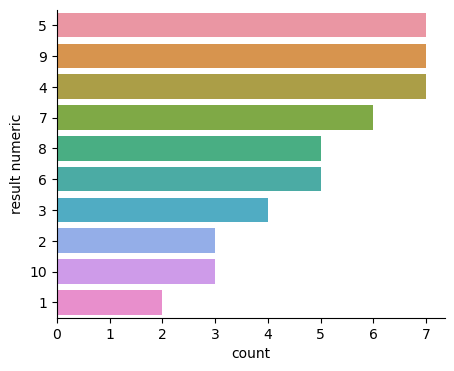

In [111]:
# Visualizando a quantidade de características comportamentais do TEA
sns.countplot(data = criancas_TEA, y='result numeric', order= criancas_TEA['result numeric'].value_counts().index )
sns.despine()

Observa-se no gráfico acima que é possível indicar indícios de uma criança possuir o TEA ao apresentar um único comportamento sugerido pelo questionário, e que todas as crianças que participaram da pesquisa apresentavam uma mais comportamentos atípicos. Nas análises abaixo essa constatação ficará mais evidente.

**Crianças com 01 comportamento característicos do TEA**

In [112]:
crianca_TEA_01_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 1]

In [113]:
crianca_TEA_01_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
216,0,0,0,0,0,0,0,0,0,1,11,m,no,yes,Turkey,1,NO
246,0,0,0,0,0,0,1,0,0,0,10,m,no,yes,'United Arab Emirates',1,NO


In [114]:
crianca_TEA_01_CARAC.shape

(2, 17)

Ao realizar o filtro percebe-se que as características comportamentais se diferem. Uma criança possui dificuldade de fazer novas amizades, enquanto que a outra possui dificuldade de percepção de intenções e sentimentos em histórias.

**Crianças com 02 comportamento característicos do TEA**

In [115]:
crianca_TEA_02_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 2]
crianca_TEA_02_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
48,0,1,0,0,1,0,0,0,0,0,7,m,no,yes,Jordan,2,NO
98,0,0,1,1,0,0,0,0,0,0,7,m,no,yes,'United States',2,NO
279,0,0,1,0,0,0,0,0,0,1,4,m,no,yes,India,2,NO


In [116]:
crianca_TEA_02_CARAC.shape

(3, 17)

**Crianças com 03 comportamento característicos do TEA**

In [117]:
crianca_TEA_03_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 3]
crianca_TEA_03_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
28,0,0,1,0,1,0,1,0,0,0,4,f,yes,yes,Georgia,3,NO
106,1,0,0,0,1,0,0,0,0,1,4,f,yes,yes,'United Kingdom',3,NO
161,0,1,0,0,0,1,0,0,0,1,9,f,no,yes,'United Kingdom',3,NO
270,1,0,1,0,0,0,0,0,1,0,4,f,no,yes,'United Kingdom',3,NO


In [118]:
crianca_TEA_03_CARAC.shape

(4, 17)

**Crianças com 04 comportamento característicos do TEA**

In [119]:
crianca_TEA_04_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 4]
crianca_TEA_04_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
103,0,0,0,0,1,1,1,0,0,1,4,m,no,yes,Malaysia,4,NO
118,0,1,1,0,1,0,0,0,0,1,4,m,no,yes,Bangladesh,4,NO
170,0,0,1,0,1,0,1,0,0,1,4,f,no,yes,Australia,4,NO
198,1,0,0,0,1,0,1,0,0,1,9,m,no,yes,Australia,4,NO
199,1,0,0,0,1,0,1,0,0,1,9,m,yes,yes,Australia,4,NO
255,0,0,0,1,1,1,0,0,0,1,5,m,no,yes,India,4,NO
287,1,0,0,0,1,0,1,0,0,1,7,f,yes,yes,Australia,4,NO


In [120]:
crianca_TEA_04_CARAC.shape

(7, 17)

Observa-se que ao buscar todas as crianças com 04 comportamentos do TEA apresentam dificuldade de manter uma conversa com seus colegas (AQ05) e dificuldade de fazer novas amizades (AQ10).

**Crianças com 05 comportamento característicos do TEA**

In [121]:
crianca_TEA_05_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 5]
crianca_TEA_05_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
4,0,0,1,0,1,1,0,1,0,1,4,m,no,yes,Egypt,5,NO
8,0,0,1,1,1,0,1,1,0,0,11,f,no,yes,Austria,5,NO
27,0,1,1,0,0,0,1,1,0,1,6,m,no,yes,'United Arab Emirates',5,NO
67,0,0,1,0,1,1,1,0,1,0,4,f,no,yes,Pakistan,5,NO
87,1,1,1,1,0,1,0,0,0,0,5,m,no,yes,'Costa Rica',5,NO
90,1,0,0,1,1,1,1,0,0,0,11,f,yes,yes,'United Kingdom',5,NO
238,1,0,0,1,1,1,0,0,0,1,11,f,no,yes,Australia,5,NO


In [122]:
crianca_TEA_05_CARAC.shape

(7, 17)

**Crianças com 06 comportamento característicos do TEA**

In [123]:
crianca_TEA_06_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 6]
crianca_TEA_06_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
24,0,0,1,1,1,0,1,1,1,0,6,m,no,yes,'United Kingdom',6,NO
99,1,1,0,1,0,1,1,0,1,0,11,f,yes,yes,'United Kingdom',6,NO
131,0,1,1,1,1,1,0,0,0,1,5,m,yes,yes,'United Kingdom',6,NO
192,1,0,1,0,1,1,1,0,1,0,4,f,yes,yes,'United Kingdom',6,NO
208,1,0,1,1,1,1,0,1,0,0,5,m,no,yes,Mexico,6,NO


In [124]:
crianca_TEA_06_CARAC.shape

(5, 17)

**Crianças com 07 comportamento característicos do TEA**

In [125]:
crianca_TEA_07_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 7]
crianca_TEA_07_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
58,1,0,1,1,1,1,0,0,1,1,4,m,no,yes,'United States',7,YES
73,1,0,1,1,1,1,0,0,1,1,8,f,no,yes,Canada,7,YES
149,1,1,1,1,1,1,0,0,0,1,4,m,no,yes,'Saudi Arabia',7,YES
150,1,0,1,0,1,1,0,1,1,1,4,m,no,yes,'United States',7,YES
157,0,1,0,1,1,1,1,0,1,1,9,m,no,yes,'United Kingdom',7,YES
209,1,0,1,1,1,1,0,1,0,1,5,m,no,yes,Mexico,7,YES


In [126]:
crianca_TEA_07_CARAC.shape

(6, 17)

Todas as crianças com 07 características comportamentais do TEA apresentavamm dificuldade de manter uma conversa com seus colegas (AQ05), Facilidade em manter conversas informais (AQ06) e Dificuldade de fazer novas amizades (AQ10). 

**Crianças com 08 comportamento característicos do TEA**

In [127]:
crianca_TEA_08_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 8]
crianca_TEA_08_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
17,1,0,1,1,1,0,1,1,1,1,11,m,no,yes,'United States',8,YES
97,1,1,1,0,1,1,1,0,1,1,4,m,no,yes,'United States',8,YES
156,1,1,0,0,1,1,1,1,1,1,6,f,no,yes,'United Kingdom',8,YES
200,1,1,1,1,1,1,1,0,1,0,4,f,no,yes,'United Kingdom',8,YES
220,1,1,1,1,1,1,1,0,0,1,4,m,no,yes,'United States',8,YES


In [128]:
crianca_TEA_08_CARAC.shape

(5, 17)

Todas as crianças com 08 comportamentos característicos do TEA apresentavam alta percepção em baixos ruídos que geralmente outros não percebem (AQ01), Dificuldade de manter uma conversa com seus colegas (AQ05) e Dificuldade de percepção de intenções e sentimentos em histórias (AQ07).

**Crianças com 09 comportamento característicos do TEA**

In [129]:
crianca_TEA_09_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 9]
crianca_TEA_09_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
68,1,0,1,1,1,1,1,1,1,1,4,m,no,yes,Canada,9,YES
77,1,1,1,1,1,1,1,0,1,1,4,m,no,yes,Brazil,9,YES
80,0,1,1,1,1,1,1,1,1,1,7,m,yes,yes,'New Zealand',9,YES
133,1,1,1,1,1,1,0,1,1,1,4,m,no,yes,'United Kingdom',9,YES
188,1,1,1,1,1,0,1,1,1,1,4,f,no,yes,Australia,9,YES
272,1,1,1,1,1,0,1,1,1,1,8,m,no,yes,Australia,9,YES
278,1,1,1,1,1,1,1,1,1,0,6,m,no,yes,India,9,YES


In [130]:
crianca_TEA_09_CARAC.shape

(7, 17)

**Crianças com 10 comportamento característicos do TEA**

In [131]:
crianca_TEA_10_CARAC = criancas_TEA.loc[criancas_TEA['result numeric'] == 10]
crianca_TEA_10_CARAC

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,result numeric,Class/ASD
138,1,1,1,1,1,1,1,1,1,1,9,m,yes,yes,'United Kingdom',10,YES
214,1,1,1,1,1,1,1,1,1,1,4,f,no,yes,'United States',10,YES
286,1,1,1,1,1,1,1,1,1,1,7,f,yes,yes,'United Kingdom',10,YES


In [132]:
crianca_TEA_10_CARAC.shape

(3, 17)

### **QP 08: Quais os sinais do transtorno que possui maior ocorrências nas crianças com TEA?**

In [133]:
#Agrupando o atributo faixa etaria
agrup_autism=criancas_TEA.groupby(criancas_TEA['austim'])

In [134]:
agrup_autism[['AQ01','AQ02','AQ03','AQ04','AQ05', 'AQ06', 'AQ07', 'AQ08', 'AQ09', 'AQ10']].sum().head()

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10
austim,,,,,,,,,,
no,0,0,0,0,0,0,0,0,0,0
yes,30,22,34,28,40,30,29,18,23,34


Observa-se que a maioria das crianças indicadas por seus pais já possuir o diagnóstico do TEA apresentavam dificuldade de manter uma conversa com seus colegas (AQ05), seguida do comportamento de facilidade de comunicação com várias pessoas diferentes ao mesmo tempo (AQ03). 

Essa análise nos permitiu perceber que realmente o Transtorno do Espectro Autista (TEA) não possui características que se repetem em todas as crianças e que basta que a criança possua uma única característica sugerida pelo questionário AQ10_Child é possível levantar um alerta quanto ao diagnóstico e procurar uma investigação com os profissionais da saúde.

## Modelagem dos Dados para implementação dos modelos de Aprendizagem de Máquina

### Eliminando os atributos que não serão utilizados nos modelos

In [135]:
# Remoção dos atributos que não serão utilizados nos modelos.
autismo_criancas.drop(columns=['age','gender', 'icterícia', 'contry_of_res', 'result numeric', 'Class/ASD'], inplace = True, axis = 1)

In [136]:
autismo_criancas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 290
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   AQ01    287 non-null    int64   
 1   AQ02    287 non-null    int64   
 2   AQ03    287 non-null    int64   
 3   AQ04    287 non-null    int64   
 4   AQ05    287 non-null    int64   
 5   AQ06    287 non-null    int64   
 6   AQ07    287 non-null    int64   
 7   AQ08    287 non-null    int64   
 8   AQ09    287 non-null    int64   
 9   AQ10    287 non-null    int64   
 10  austim  287 non-null    category
dtypes: category(1), int64(10)
memory usage: 25.1 KB


**Separando os atributos (features) e a classe**

In [137]:
colunas_drop = ["austim"]

X = autismo_criancas.drop(colunas_drop, axis = 1).to_numpy()
y = autismo_criancas["austim"].values

## Codificando os rótulos

In [138]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

### Utilizando técnicas para o Balanceamento dos dados

### Aplicando o  SMOTE

In [139]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X, y = smote_tomek.fit_resample(X, y)

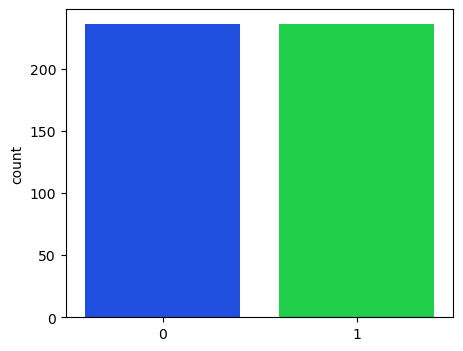

In [140]:
ax = sns.countplot(x=y);

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20, stratify=y_train)

**Padronizando separadamente as bases**

In [143]:
X_train = preprocessing.minmax_scale(X_train)
X_test = preprocessing.minmax_scale(X_test)
X_valid = preprocessing.minmax_scale(X_valid)

In [144]:
clf = DecisionTreeClassifier(criterion='entropy')
model = clf.fit(X_train, y_train)

## PCA

### Plotando o dataset
* As classes são destacadas por cores
* Técnica de Análise de Componentes Principais para reduzir as dimensões

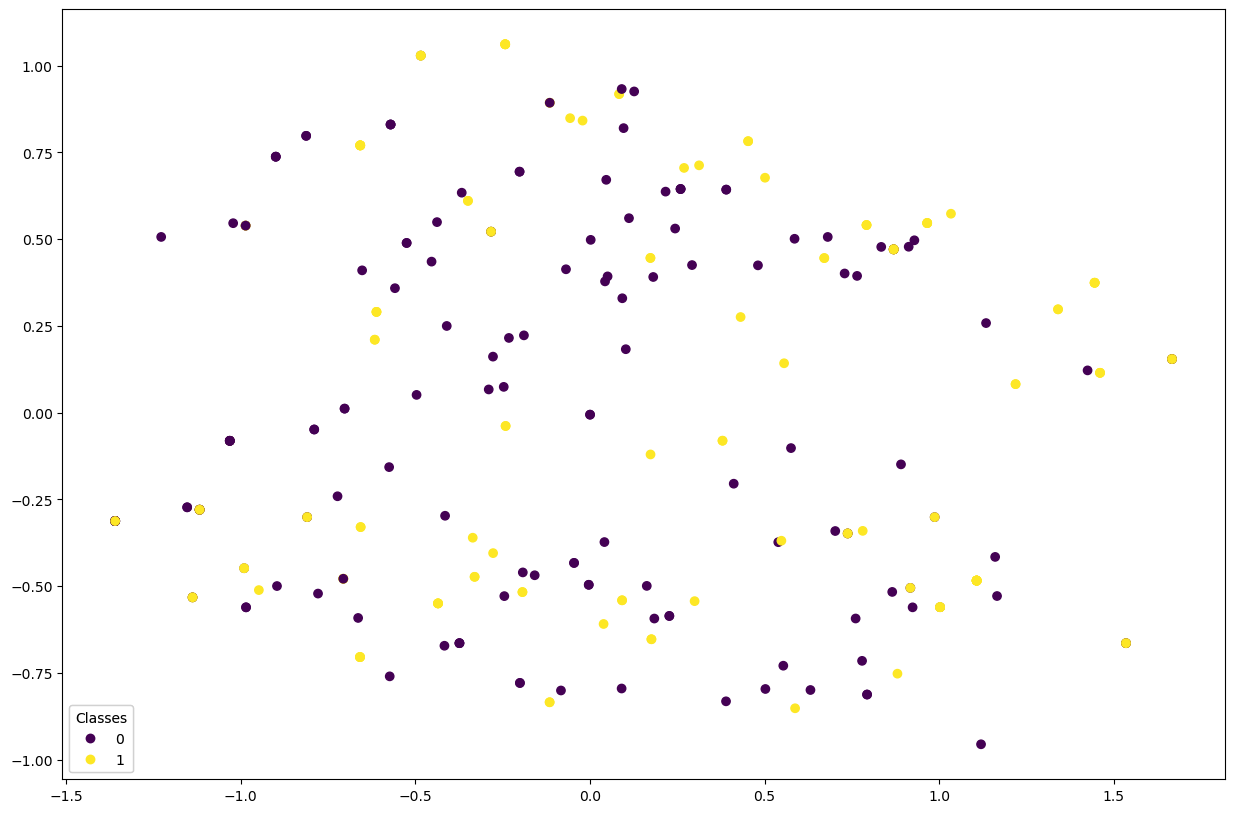

In [145]:
pca = PCA(2)
X_pca = pca.fit_transform(preprocessing.minmax_scale(X_train))

fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

# Naive Bayse

**Instanciando o modelo**

In [146]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

**Imprimindo o Relatório de Teste**

In [147]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

print("Score de teste:", precision_score(y_test, nb.predict(X_test), average="micro"))

print(classification_report(y_test, nb.predict(X_test)))

Score de teste: 0.6736842105263158
              precision    recall  f1-score   support

           0       0.65      0.75      0.70        48
           1       0.70      0.60      0.64        47

    accuracy                           0.67        95
   macro avg       0.68      0.67      0.67        95
weighted avg       0.68      0.67      0.67        95



**Validando o modelo**
* Usando a métrica de precisão para avaliar o modelo.

In [148]:
from tqdm import tqdm 
import numpy as np

scores_train, scores_valid, params = [], [], []

search_space = np.linspace(1e-12,1, 10)

# Definindo uma barra de progresso:

for var in tqdm(search_space, desc="Treinamento: "):
  nb = GaussianNB(var_smoothing=var)
  
  nb.fit(X_train, y_train)
  
  score_train = precision_score(y_train, nb.predict(X_train), average="micro")
  
  score_valid = precision_score(y_valid, nb.predict(X_valid), average="micro")

  scores_train.append(score_train)
  scores_valid.append(score_valid)
  params.append(dict(var_smoothing=var))

Treinamento: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 416.60it/s]


In [149]:
zipped_results = zip(scores_train, scores_valid, params)

best_result =  max(zipped_results, key = lambda res: res[1])

best_score_train, best_score_valid, best_params = best_result

print("Melhores parâmetros: ", best_params)
print("Melhor score de treino: ", best_score_train)
print("Melhor score de validação: ", best_score_valid)

Melhores parâmetros:  {'var_smoothing': 1e-12}
Melhor score de treino:  0.5946843853820598
Melhor score de validação:  0.6578947368421053


**Testando o modelo com os parâmetros otimizados**

In [152]:
svm = GaussianNB()

svm.fit(X_train, y_train)

print("Score de teste:", precision_score(y_test, svm.predict(X_test), average="micro"))
print(classification_report(y_test, svm.predict(X_test)))

Score de teste: 0.6736842105263158
              precision    recall  f1-score   support

           0       0.65      0.75      0.70        48
           1       0.70      0.60      0.64        47

    accuracy                           0.67        95
   macro avg       0.68      0.67      0.67        95
weighted avg       0.68      0.67      0.67        95



In [166]:
#Testando o modelo
naive_bayse_prev = svm.predict(X_test)

In [167]:
#Calculando o desempenho
total_teste = X_test.shape[0]
total_acertos = (y_test == naive_bayse_prev).sum()
desempenho = (total_acertos / total_teste ) * 100
print('Total de casos de testes {}, com {} acertos e com desempenho {:05.2f}%'.format(total_teste, total_acertos, desempenho))

Total de casos de testes 95, com 64 acertos e com desempenho 67.37%


In [196]:
print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, naive_bayse_prev)))

Acurácia: 0.6737


In [197]:
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_test , naive_bayse_prev)

print('#### Matrix de Confusão ####')
print('\nVerdadeiro Positivo(TP) = ', cm_nb[0,0])
print('\nVerdadeiro Negatives(TN) = ', cm_nb[1,1])
print('\nFalso Positivo(FP) = ', cm_nb[0,1])
print('\nFalso Negativo(FN) = ', cm_nb[1,0])

#### Matrix de Confusão ####

Verdadeiro Positivo(TP) =  36

Verdadeiro Negatives(TN) =  28

Falso Positivo(FP) =  12

Falso Negativo(FN) =  19


<AxesSubplot:>

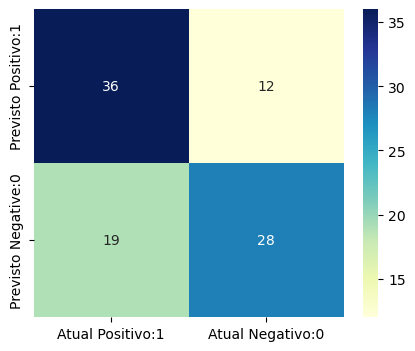

In [198]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_nb, columns=['Atual Positivo:1', 'Atual Negativo:0'], 
                                 index=['Previsto Positivo:1', 'Previsto Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Random Forest

## Instanciando as bibliotecas

In [168]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


## Avaliando o modelo com os parâmetros padrões

In [169]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

def f1_weighted(y_true, y_pred):
  """ Função auxiliar para o cálculo da medida-f ponderada """
  return f1_score(y_true, y_pred, average="weighted").round(3)

def score_model(model, X, y, n_splits=10, n_repeats=3, scoring='f1_weighted'):

  cv = RepeatedStratifiedKFold(n_splits=n_splits, 
                               n_repeats=n_repeats) 
  n_scores = cross_val_score(model, X, y, 
                             scoring=scoring, 
                             cv=cv, 
                             n_jobs=-1, 
                             error_score='raise')
  
  return f'{scoring.title()}: %.3f (%.3f)' % (n_scores.mean(), n_scores.std())


model = RandomForestClassifier()
print("Train >>", score_model(model, X_train, y_train))
model.fit(X_train, y_train)
print("Test score: ", f1_weighted(y_test, model.predict(X_test)))

Train >> F1_Weighted: 0.774 (0.075)
Test score:  0.85


**Validando o modelo**

In [170]:
from sklearn.model_selection import GridSearchCV

# Definindo a lista de parâmetros e seus possíveis valores.

parameters = {
    "n_estimators": range(10, 101, 10),
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
}


# Notem que a validação agora demora mais que com os modelos que usamos até então.
grid_search = GridSearchCV(RandomForestClassifier(), 
                    parameters,
                    scoring  = "f1_weighted",
                    n_jobs= -1, 
                    verbose=4,
                    cv = 10)# Quando atribuímos um número inteiro (quantidade de folds) ao parâmetro cv, a validação cruzada é estratificada

grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(10, 101, 10)},
             scoring='f1_weighted', verbose=4)

## Melhores parâmetros

In [171]:
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 80}


## Score de teste pós validação

In [172]:
model = RandomForestClassifier(**best_params)

print("Train >> ", score_model(model, X_train, y_train))
model.fit(X_train, y_train)
print("Test score pós-validação: ", f1_weighted(y_test, model.predict(X_test)))

model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Test score PRÉ-validação: ", f1_weighted(y_test, model.predict(X_test)))

Train >>  F1_Weighted: 0.782 (0.069)
Test score pós-validação:  0.861
Test score PRÉ-validação:  0.873


In [173]:
print("Score de teste:", precision_score(y_test, model.predict(X_test), average="micro"))
print(classification_report(y_test, model.predict(X_test)))

Score de teste: 0.8736842105263158
              precision    recall  f1-score   support

           0       0.95      0.79      0.86        48
           1       0.82      0.96      0.88        47

    accuracy                           0.87        95
   macro avg       0.88      0.87      0.87        95
weighted avg       0.88      0.87      0.87        95



In [174]:
#Testando o modelo
rf_prev = model.predict(X_test)

#Calculando o desempenho
total_teste = X_test.shape[0]
total_acertos = (y_test == rf_prev).sum()
desempenho = (total_acertos / total_teste ) * 100
print('Total de casos de testes {}, com {} acertos e com desempenho {:05.2f}%'.format(total_teste, total_acertos, desempenho))

Total de casos de testes 95, com 83 acertos e com desempenho 87.37%


In [205]:
print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, rf_prev)))

Acurácia: 0.8737


In [206]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test , rf_prev)

print('#### Matrix de Confusão ####')
print('\nVerdadeiro Positivo(TP) = ', cm_rf[0,0])
print('\nVerdadeiro Negatives(TN) = ', cm_rf[1,1])
print('\nFalso Positivo(FP) = ', cm_rf[0,1])
print('\nFalso Negativo(FN) = ', cm_rf[1,0])

#### Matrix de Confusão ####

Verdadeiro Positivo(TP) =  38

Verdadeiro Negatives(TN) =  45

Falso Positivo(FP) =  10

Falso Negativo(FN) =  2


<AxesSubplot:>

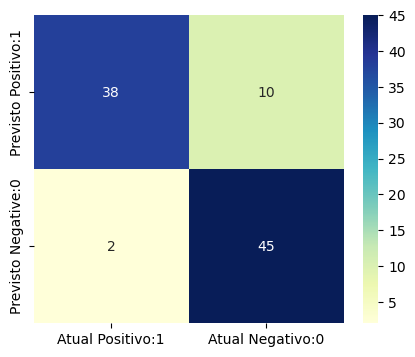

In [207]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_rf, columns=['Atual Positivo:1', 'Atual Negativo:0'], 
                                 index=['Previsto Positivo:1', 'Previsto Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Importância de cada feature

In [175]:
features_name = autismo_criancas.columns

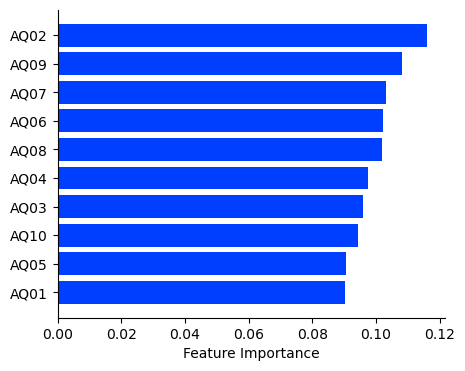

In [176]:
sort = model.feature_importances_.argsort()

qtd = len(sort) - 10

plt.barh(features_name[sort][qtd:], model.feature_importances_[sort][qtd:])
plt.xlabel("Feature Importance")
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False)
plt.show()

# KNN

## Instanciando modelo 

TODO: Listar aqui alguns parâmetros importantes

In [181]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 100)
k_scores_train = []
k_scores_valid = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)

    k_scores_train.append(knn.score(X_train, y_train))   
    k_scores_valid.append(knn.score(X_valid, y_valid))

best_values = max(zip(k_range, k_scores_train, k_scores_valid), key=lambda v:v[-1])

best_k, best_acc_train, best_acc_valid = best_values

print("Melhor k: ", best_k)
print("Melhor acurárica de treino: ", best_acc_train)
print("Melhor acurárica de validação: ", best_acc_valid)

Melhor k:  4
Melhor acurárica de treino:  0.840531561461794
Melhor acurárica de validação:  0.7894736842105263


## Avaliando modelo treinado

In [183]:
k_vizinhos = KNeighborsClassifier(n_neighbors=best_k)
k_vizinhos.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [185]:
print("Acurácia de treino: ", k_vizinhos.score(X_train, y_train))
print("Acurácia de validação: ", k_vizinhos.score(X_valid, y_valid))
print("Acurácia de teste: ", k_vizinhos.score(X_test, y_test))

Acurácia de treino:  0.840531561461794
Acurácia de validação:  0.7894736842105263
Acurácia de teste:  0.7789473684210526


In [186]:
print("Score de teste:", precision_score(y_test, k_vizinhos.predict(X_test), average="micro"))
print(classification_report(y_test, k_vizinhos.predict(X_test)))

Score de teste: 0.7789473684210526
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        48
           1       0.81      0.72      0.76        47

    accuracy                           0.78        95
   macro avg       0.78      0.78      0.78        95
weighted avg       0.78      0.78      0.78        95



In [187]:
#Testando o modelo
knn_prev =  k_vizinhos.predict(X_test)

#Calculando o desempenho
total_teste = X_test.shape[0]
total_acertos = (y_test == knn_prev).sum()
desempenho = (total_acertos / total_teste ) * 100
print('Total de casos de testes {}, com {} acertos e com desempenho {:05.2f}%'.format(total_teste, total_acertos, desempenho))

Total de casos de testes 95, com 74 acertos e com desempenho 77.89%


In [208]:
print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, knn_prev)))

Acurácia: 0.7789


In [209]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test , knn_prev)

print('#### Matrix de Confusão ####')
print('\nVerdadeiro Positivo(TP) = ', cm_knn[0,0])
print('\nVerdadeiro Negatives(TN) = ', cm_knn[1,1])
print('\nFalso Positivo(FP) = ', cm_knn[0,1])
print('\nFalso Negativo(FN) = ', cm_knn[1,0])

#### Matrix de Confusão ####

Verdadeiro Positivo(TP) =  40

Verdadeiro Negatives(TN) =  34

Falso Positivo(FP) =  8

Falso Negativo(FN) =  13


<AxesSubplot:>

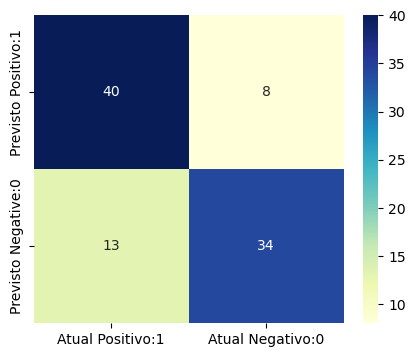

In [210]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_knn, columns=['Atual Positivo:1', 'Atual Negativo:0'], 
                                 index=['Previsto Positivo:1', 'Previsto Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# SVM

## Instanciando o modelo

In [190]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")

svm.fit(X_train, y_train)

SVC(kernel='linear')

## Testanto o modelo

In [191]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

print("Score de teste:", precision_score(y_test, svm.predict(X_test), average="micro"))

print(classification_report(y_test, svm.predict(X_test)))

Score de teste: 0.6631578947368421
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        48
           1       0.66      0.66      0.66        47

    accuracy                           0.66        95
   macro avg       0.66      0.66      0.66        95
weighted avg       0.66      0.66      0.66        95



## Otimização dos parâmetros
* Vamos treinar o modelo com os Kernel: Linear, Poly, rbf, sigmoid
* Vamos experimentar tunar os seguintes parâmetros do SVM:
* C - Parâmetro de regularização
* degree - Grau do polinômio
* coef0 - Valor do termo indepedente do polinômio

In [193]:
#Importando as bibliotecas
from sklearn.metrics import precision_score
from tqdm import tqdm 
from itertools import product
import numpy as np

# Adicionando um for para realizar o treinamento de uma lista de Kernel.
for i in range(2):
  lista_kernel = ['linear', 'poly']
  print('***********************************************************************')
  print("Iniciando o processo de teste para o Kernel: {}".format(lista_kernel[i]))
  
  #Adicionando outro for para realizar 5 treinamento para cada Kernel e com parâmentos diferentes para cada treinamento.
  for t in range(3):
    print("****************************   Teste {}/3   *************************".format(t+1))
 #Definindo os valores dos possíveis parâmetros para cada teste.   
    C_start = [0.1, 0.5, 1]
    C_stop = [2, 10, 10, 100,1000]
    C_range = np.linspace(C_start[t],C_stop[t] , 10).round(2)
    degree_range = np.linspace(2, 6)
    coef0_range = np.linspace(.5, 10, 10).round(2)    
    
    search_space = tuple(product(C_range, degree_range, coef0_range))

    print("Quantidade de treinamentos que serão efetuados na validação: ", len(search_space))

# Validadação do treinamento, utilizando a métrica de precisão para avaliar o modelo

    scores_train, scores_valid, params = [], [], []
    
    for C, degree, coef0 in tqdm(search_space, desc="Treinamento: "):
      
      svm = SVC(C=C, 
              degree=degree, 
              coef0 = coef0, 
              kernel=lista_kernel[i])
      
      svm.fit(X_train, y_train)
      
      score_train = precision_score(y_train, svm.predict(X_train), average="micro")
      
      score_valid = precision_score(y_valid, svm.predict(X_valid), average="micro")

      scores_train.append(score_train)
      scores_valid.append(score_valid)
      params.append(dict(C=C, degree=degree, coef0=coef0))

      
  
# Exibindo os resultados para cada treinamento
    print('#####################################################################')
    print("*****************    Exibindo o melhor resultado    ****************")
    

      
    zipped_results = zip(scores_train, scores_valid, params)

    best_result =  max(zipped_results, key = lambda res: res[1])

    best_score_train, best_score_valid, best_params = best_result

    print("Melhores parâmetros: ", best_params)
    print("Melhor score de treino: ", best_score_train)
    print("Melhor score de validação: ", best_score_valid)
    print('\n')

***********************************************************************
Iniciando o processo de teste para o Kernel: linear
****************************   Teste 1/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [00:52<00:00, 94.70it/s]


#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 0.1, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.6511627906976745
Melhor score de validação:  0.631578947368421


****************************   Teste 2/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [00:55<00:00, 89.77it/s]


#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 0.5, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.6677740863787376
Melhor score de validação:  0.618421052631579


****************************   Teste 3/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [00:58<00:00, 86.18it/s]


#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 1.0, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.6677740863787376
Melhor score de validação:  0.618421052631579


***********************************************************************
Iniciando o processo de teste para o Kernel: poly
****************************   Teste 1/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [03:44<00:00, 22.31it/s]


#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 0.1, 'degree': 5.020408163265306, 'coef0': 3.67}
Melhor score de treino:  0.9136212624584718
Melhor score de validação:  0.8157894736842105


****************************   Teste 2/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:04<00:00, 13.72it/s]


#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 0.5, 'degree': 4.040816326530612, 'coef0': 6.83}
Melhor score de treino:  0.9136212624584718
Melhor score de validação:  0.8157894736842105


****************************   Teste 3/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:16<00:00, 13.29it/s]

#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 1.0, 'degree': 4.040816326530612, 'coef0': 3.67}
Melhor score de treino:  0.9136212624584718
Melhor score de validação:  0.8157894736842105




## Testando o modelo com os parâmetros otimizados e utilizando os melhores resultados do melhor Kernel.¶

In [195]:
#Testando o modelo com o melhor resultado para cada Kernel

#Testando o modelo com o melhor resultado encontrado no treinamento para Kernel Linear
svm = SVC(kernel="poly",
          C= 1, 
          degree= 4.0, 
          coef0 = 3.67,)

svm.fit(X_train, y_train)

print("Score de teste:", precision_score(y_test, svm.predict(X_test), average="micro"))
print(classification_report(y_test, svm.predict(X_test)))

Score de teste: 0.8210526315789474
              precision    recall  f1-score   support

           0       0.97      0.67      0.79        48
           1       0.74      0.98      0.84        47

    accuracy                           0.82        95
   macro avg       0.86      0.82      0.82        95
weighted avg       0.86      0.82      0.82        95



In [199]:
#Testando o modelo
svm_prev = svm.predict(X_test)

In [200]:
#Calculando o desempenho
total_teste = X_test.shape[0]
total_acertos = (y_test == svm_prev).sum()
desempenho = (total_acertos / total_teste ) * 100
print('Total de casos de testes {}, com {} acertos e com desempenho {:05.2f}%'.format(total_teste, total_acertos, desempenho))

Total de casos de testes 95, com 78 acertos e com desempenho 82.11%


In [201]:
print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, svm_prev )))

Acurácia: 0.8211


In [202]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test , svm_prev)

print('#### Matrix de Confusão ####')
print('\nVerdadeiro Positivo(TP) = ', cm_svm[0,0])
print('\nVerdadeiro Negatives(TN) = ', cm_svm[1,1])
print('\nFalso Positivo(FP) = ', cm_svm[0,1])
print('\nFalso Negativo(FN) = ', cm_svm[1,0])

#### Matrix de Confusão ####

Verdadeiro Positivo(TP) =  32

Verdadeiro Negatives(TN) =  46

Falso Positivo(FP) =  16

Falso Negativo(FN) =  1


<AxesSubplot:>

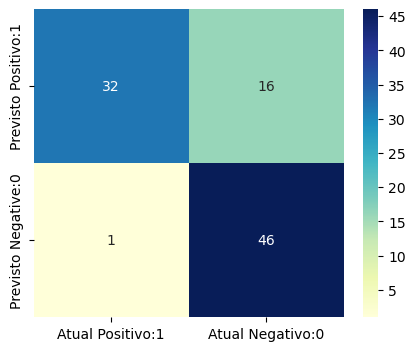

In [203]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_svm, columns=['Atual Positivo:1', 'Atual Negativo:0'], 
                                 index=['Previsto Positivo:1', 'Previsto Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')